In [193]:
import numpy
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [51]:
df=pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [52]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Other,International,A,3197
50726,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,5836
50727,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,6650
50728,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679


#### Data Preparstion and Cleaning
+ Load the dataet into a data frame using Pandas
+ Explore the number of rows & columns, ranges of values etc.
+ handle missing, incorrect and invalid data
+ Perform any additional steps(parsing dates, creating additional columns, merging multiple dataset etc.)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              50730 non-null  int64 
 1   Operating Airline            50730 non-null  object
 2   Operating Airline IATA Code  50427 non-null  object
 3   Published Airline            50730 non-null  object
 4   Published Airline IATA Code  50427 non-null  object
 5   GEO Summary                  50730 non-null  object
 6   GEO Region                   50730 non-null  object
 7   Activity Type Code           50730 non-null  object
 8   Price Category Code          50730 non-null  object
 9   Terminal                     50730 non-null  object
 10  Boarding Area                50730 non-null  object
 11  Passenger Count              50730 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.6+ MB


In [54]:
df.drop(["Operating Airline IATA Code","Published Airline IATA Code"],axis=1,inplace=True)

In [55]:
df

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Other,International,A,3197
50726,202212,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,5836
50727,202212,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Other,International,A,6650
50728,202212,WestJet Airlines,WestJet Airlines,International,Canada,Deplaned,Other,International,A,1679


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Activity Period      50730 non-null  int64 
 1   Operating Airline    50730 non-null  object
 2   Published Airline    50730 non-null  object
 3   GEO Summary          50730 non-null  object
 4   GEO Region           50730 non-null  object
 5   Activity Type Code   50730 non-null  object
 6   Price Category Code  50730 non-null  object
 7   Terminal             50730 non-null  object
 8   Boarding Area        50730 non-null  object
 9   Passenger Count      50730 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [61]:
def new_col(df):
    df['Year']=0
    df['month']=0
    for idx,value in df["Activity Period"].items():
        val=str(value)
        df.at[idx,'Year']=int(val[0:4])
        df.at[idx,'month']=int(val[4:6])
    return df

In [62]:
new_col(df)

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Other,International,A,3197,2022,12
50726,202212,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,5836,2022,12
50727,202212,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Other,International,A,6650,2022,12
50728,202212,WestJet Airlines,WestJet Airlines,International,Canada,Deplaned,Other,International,A,1679,2022,12


In [74]:
df.describe()

,Activity Period,Passenger Count,Year,month
count,50730.000000,50730.000000,50730.000000,50730.000000
mean,201390.461640,28489.836073,2013.838951,6.566509
std,495.261863,60100.148363,4.954727,3.437665
min,200507.000000,1.000000,2005.000000,1.000000
25%,201001.000000,4553.000000,2010.000000,4.000000
50%,201408.000000,8645.500000,2014.000000,7.000000
75%,201807.000000,19508.500000,2018.000000,10.000000
max,202212.000000,659837.000000,2022.000000,12.000000


In [78]:
df=df.drop(['Activity Period'],axis=1)

In [79]:
df

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,month
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...
50725,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Other,International,A,3197,2022,12
50726,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,5836,2022,12
50727,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Other,International,A,6650,2022,12
50728,WestJet Airlines,WestJet Airlines,International,Canada,Deplaned,Other,International,A,1679,2022,12


In [82]:
ship=df.groupby('Year')['Operating Airline'].count()
ship

Year
2005    1390
2006    2738
2007    2818
2008    2866
2009    2786
2010    2766
2011    2780
2012    2756
2013    2716
2014    2736
2015    2920
2016    3190
2017    3456
2018    3712
2019    3740
2020    2368
2021    2632
2022    2360
Name: Operating Airline, dtype: int64

#### Q. How many Airlines were operating in a year?

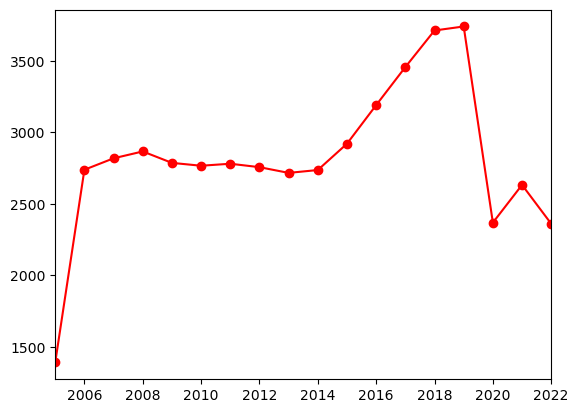

In [100]:
fig, ax=plt.subplots()
ax.set_xlim(2005,2022)
plt.plot(ship,'o-r')


no. of airlines operating in previous years by KDE plot

Text(0.5, 1.0, 'Density of Airlines')

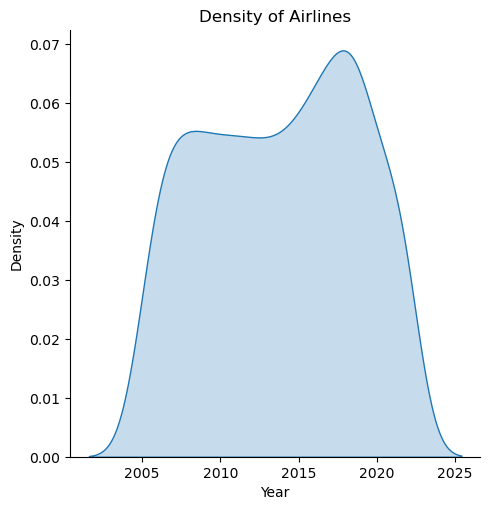

In [131]:
sns.displot(df,x='Year',kind='kde',bw_adjust=2,fill=True)
plt.title("Density of Airlines")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022')])

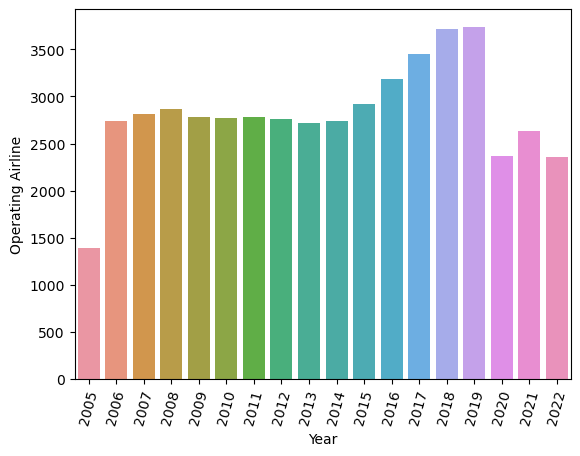

In [143]:
sns.barplot(x=ship.index,y=ship)
plt.xticks(rotation=75)

so, we can see in year 2019 number of airlines were highest.

#### Q. Which passengers travel the most, domestic or international?

In [146]:
x=df.groupby(['GEO Summary'])['Passenger Count'].sum()

Text(0.5, 1.0, 'Domestic Vs International Passengers')

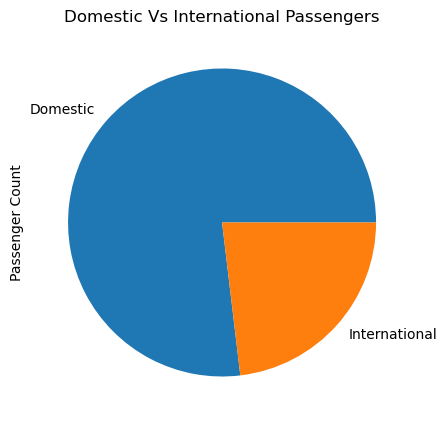

In [153]:
x.plot.pie(figsize=(5,5))
plt.title('Domestic Vs International Passengers')

In [149]:
x

GEO Summary
Domestic         1111324977
International     333964407
Name: Passenger Count, dtype: int64

Domestic Passengers are more.

#### Q. Which flights are more, domestic or international?

In [150]:
y=df.groupby(['GEO Summary'])['Published Airline'].count()

In [151]:
y

GEO Summary
Domestic         17881
International    32849
Name: Published Airline, dtype: int64

Text(0.5, 1.0, 'Domestic Vs International flights')

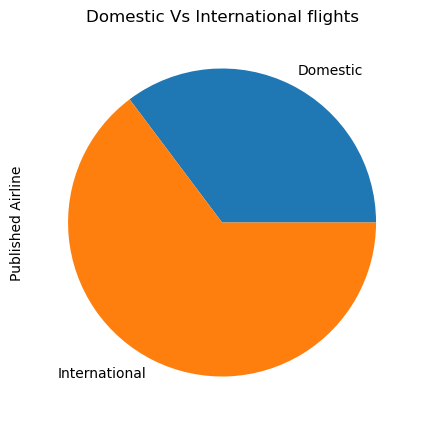

In [155]:
y.plot.pie(figsize=(5,5))
plt.title('Domestic Vs International flights')

#### so, International flights are more in numbers

#### Q. In Which geo region passengers travel the most in last few years?

In [156]:
z=df.groupby(['GEO Region'])['Passenger Count'].sum()

In [157]:
z

GEO Region
Asia                    136060595
Australia / Oceania      16499694
Canada                   44254002
Central America           6086082
Europe                   91201840
Mexico                   30192770
Middle East               9167780
South America              501644
US                     1111324977
Name: Passenger Count, dtype: int64

<Axes: ylabel='Passenger Count'>

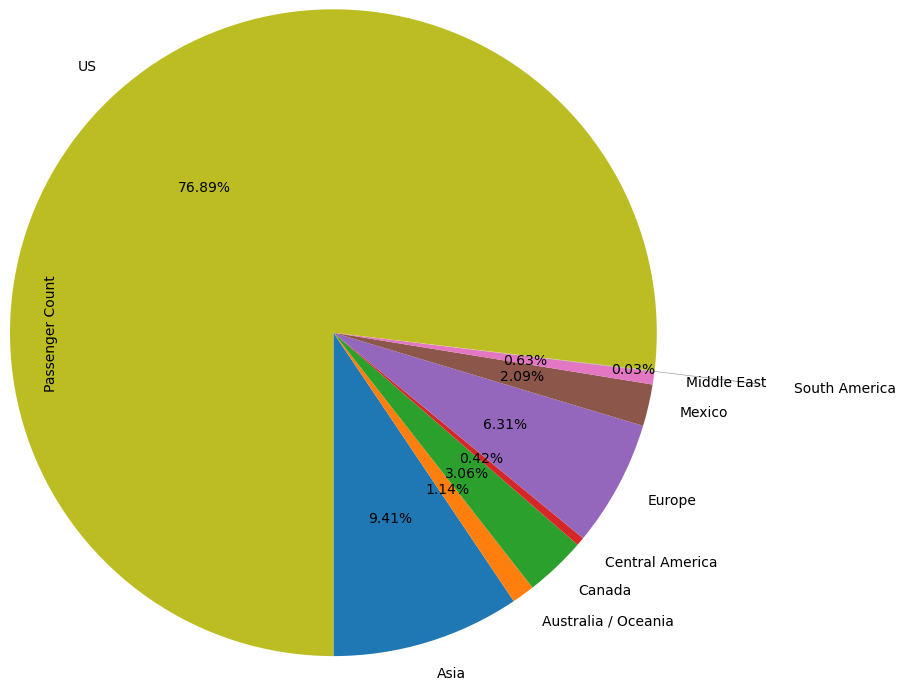

In [183]:
z.plot.pie(autopct='%1.2f%%',startangle=-90,radius=1.5,figsize=(7,7),explode=(0,0,0,0,0,0,0,0.5,0))


#### In US people traveled the most in past years.

Text(0.5, 1.0, 'no. of flights for different terminals')

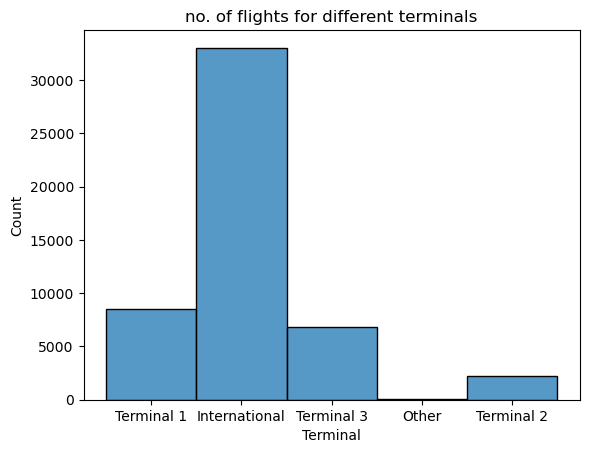

In [185]:
sns.histplot(data=df,x='Terminal')
plt.title('no. of flights for different terminals')

Text(0.5, 1.0, 'no. of flights for different boarding area')

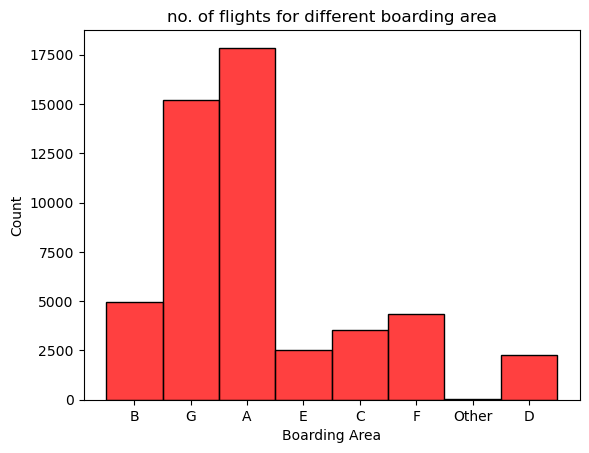

In [187]:
sns.histplot(data=df,x='Boarding Area',color='red')
plt.title('no. of flights for different boarding area')

In [191]:
p=df.groupby(['Boarding Area'])['Boarding Area'].count()
p

Boarding Area
A        17850
B         4973
C         3524
D         2250
E         2511
F         4344
G        15224
Other       54
Name: Boarding Area, dtype: int64

<Axes: ylabel='Boarding Area'>

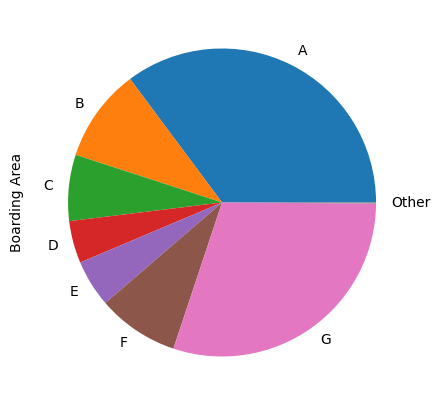

In [192]:
p.plot.pie(figsize=(5,5))